<a href="https://colab.research.google.com/github/vlasova-us/BPMN_scheme/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%C2%AB%D0%9A%D0%B5%D0%B9%D1%81%D1%8B_%D0%B8_%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B8_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Контекст**
Дан набор данных по оттоку клиентов. Набор данных содержит всего 5 000 записей (то есть абонентов).

**Данные** доступны [тут](https://drive.google.com/file/d/1ArslqEEno2hrr5tAs25P0JN0P-coLcFD/view?usp=sharing)

**Перечень полей:**

* state – штат
* account length – абонентский стаж
* area code – код региона
* phone number – номер телефона
* international plan – тарифный план для международных звонков
* voice mail plan – тарифный план для голосовой почты
* number vmail messages – количество сообщений голосовой почты
* total day minutes – общая длительность звонков в дневное время (мин)
* total day calls – общее количество звонков в дневное время
* total day charge – общая стоимость звонков в дневное время
* total eve minutes – общая длительность звонков в вечернее время (мин)
* total eve calls – общее количество звонков в вечернее время
* total eve charge – общая стоимость звонков в вечернее время
* total night minutes – общая длительность звонков в ночное время (мин)
* total night calls – общее количество звонков в ночное время
* total night charge – общая стоимость звонков в ночное время
* total intl minutes – общая длительность международных звонков (мин)
* total intl calls – общее количество международных звонков
* total intl charge – общая стоимость международных звонков
* number customer service calls – количество звонков в службу поддержки
* churned – покинул ли клиент компанию

**Описание задания**
Ваша задача - используя pandas или pyspark, ответить на следующие вопросы:

* Построить гистограмму количества звонков в техническую поддержку
* Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)
* Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (доп. материалы общего количества минут и количества звонков в техподдержку
* Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента
* Вывести top-5 самых много и самых мало говорящих клиентов
* Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата
* Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалить колонку, если вы делаете решение на pyspark
* Разбить данные на множества для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные атрибуты)
* Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/churn.csv')
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [ ]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   international_plan             5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

array([[<Axes: title={'center': 'number_customer_service_calls'}>]],
      dtype=object)

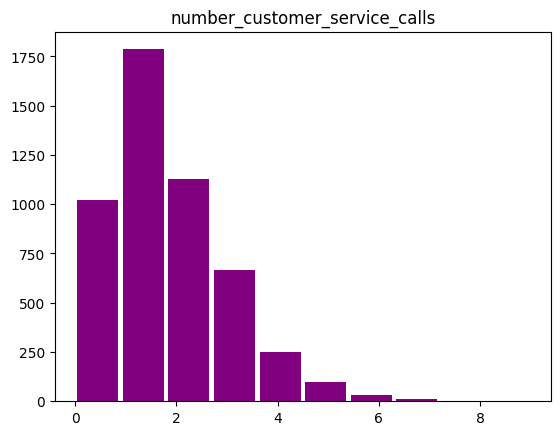

In [ ]:
# Построить гистограмму количества звонков в техническую поддержку
df.hist (column='number_customer_service_calls', bins= 10 , grid= False , rwidth= .9 , color='purple')

array([[<Axes: title={'center': 'sum_minutes'}>]], dtype=object)

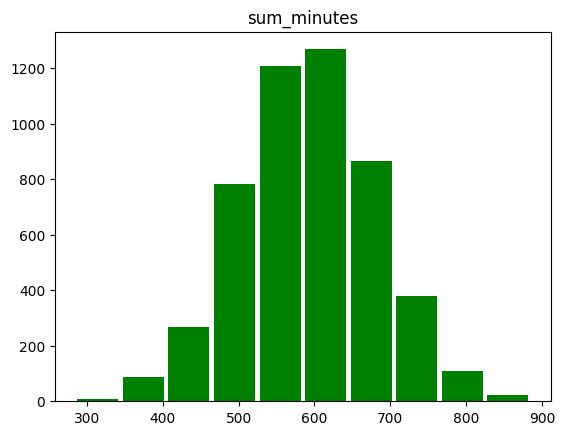

In [ ]:
# Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)
df['sum_minutes'] = df['total_day_minutes'] + df ['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
df.hist (column='sum_minutes', bins= 10 , grid= False , rwidth= .9 , color='green')


In [ ]:
# Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку
sum_minutes = df['sum_minutes'].values
service_calls = df['number_customer_service_calls'].values
sum_minutes_mean = sum_minutes.mean()
customer_service_mean = service_calls.mean()

In [ ]:
sum_minutes_shifted = sum_minutes - sum_minutes_mean
service_calls_shifted = service_calls - customer_service_mean

In [ ]:
(sum_minutes_shifted * service_calls_shifted).sum() / (math.sqrt(((sum_minutes_shifted**2).sum())*(service_calls_shifted**2).sum()))

-0.011407910827441414

In [ ]:
# Проверка встроенным методом
df[['sum_minutes', 'number_customer_service_calls']].corr(method='pearson')

,sum_minutes,number_customer_service_calls
sum_minutes,1.000000,-0.011408
number_customer_service_calls,-0.011408,1.000000


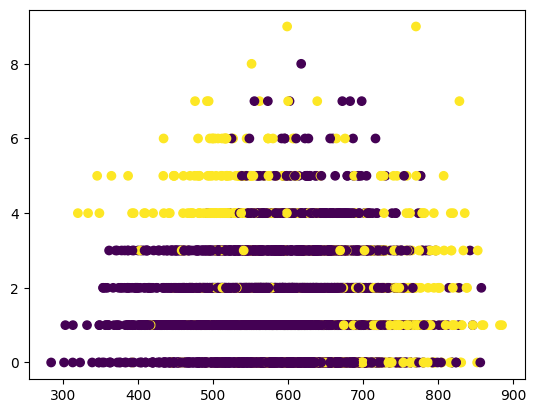

In [ ]:
# Используя функцию scatter из matplotlib визуализировать график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента
plt.scatter(sum_minutes, service_calls, c=df['churned'])

In [ ]:
# Вывести top-5 самых много и самых мало говорящих клиентов
df.sort_values('sum_minutes', ascending=False).head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,sum_minutes
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,21.21,275.4,102,12.39,13.3,9,3.59,1,True,885.0
289,OK,89,510,352-6976,no,no,0,303.9,95,51.66,...,22.18,312.1,89,14.04,5.3,3,1.43,1,True,882.2
3205,MS,111,408,345-3787,no,no,0,294.7,90,50.10,...,25.04,260.1,121,11.70,10.8,3,2.92,1,True,860.2
4991,AZ,97,510,410-3888,no,no,0,252.6,89,42.94,...,28.93,256.5,67,11.54,8.8,5,2.38,1,True,858.2
4271,MO,103,415,370-4667,no,yes,37,230.7,112,39.22,...,27.15,299.4,77,13.47,7.9,3,2.13,2,False,857.4


In [ ]:
df.sort_values('sum_minutes', ascending= True).head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,sum_minutes
648,WI,131,415,331-3174,no,yes,39,69.1,122,11.75,...,8.61,104.8,94,4.72,9.1,4,2.46,0,False,284.3
1233,IL,48,510,380-5246,no,no,0,128.2,71,21.79,...,4.09,116.3,80,5.23,8.9,3,2.40,0,False,301.5
3779,MN,141,408,362-8044,no,no,0,77.8,123,13.23,...,12.27,75.3,65,3.39,5.7,7,1.54,1,False,303.2
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,11.59,156.6,89,7.05,12.1,1,3.27,0,False,313.0
992,MI,45,510,375-8934,no,yes,26,91.7,104,15.59,...,12.80,63.3,103,2.85,7.7,5,2.08,1,False,313.3


In [ ]:
# Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора  в зависимости от штата
df['day_minute_cost'] = df['total_day_charge'] / df['total_day_minutes']
df.groupby('state')[['churned', 'day_minute_cost']].agg('mean').sort_values('churned', ascending=False).head()

,churned,day_minute_cost
state,,
CA,0.269231,0.170003
NJ,0.250000,0.170001
WA,0.244898,0.170002
TX,0.224138,0.170003
MT,0.212121,0.170001


In [ ]:
# перевести штат в one-hot формат при помощи pandas-функции get_dummies
df_dum = pd.get_dummies(df, columns=['state'])
df_dum

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,408,365-8751,no,yes,40,235.7,127,40.07,223.0,...,0,0,0,0,0,0,0,0,0,0
4996,152,415,334-9736,no,no,0,184.2,90,31.31,256.8,...,0,0,0,0,0,0,0,0,1,0
4997,61,415,333-6861,no,no,0,140.6,89,23.90,172.8,...,0,0,0,0,0,0,0,0,0,0
4998,109,510,394-2206,no,no,0,188.8,67,32.10,171.7,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Разбить данные на множество для обучения и для проверки
df_dum.columns

Index(['account_length', 'area_code', 'phone_number', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'sum_minutes',
       'day_minute_cost', 'state_AK', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_dum[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY']], df_dum['churned'], test_size=0.2)

In [ ]:
# Привести данные к одному масштабу при помощи StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.score(X_test, y_test)

0.846